In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
# Lendo o dataset
df = pd.read_csv('T2.csv', header=6, encoding='latin-1', sep=';')
df.head()

,Tipo de Unidade,Unidade,Sexo,Categoria,Subcategoria,Total
0,A - Ensino e Pesquisa,EACH,Feminino,Aluno,Graduação,2551
1,A - Ensino e Pesquisa,EACH,Feminino,Aluno,Pós-Graduação,750
2,A - Ensino e Pesquisa,EACH,Feminino,Aluno,Total,3301
3,A - Ensino e Pesquisa,EACH,Feminino,Pós-Doutorando,Pós-Doutorando,51
4,A - Ensino e Pesquisa,EACH,Feminino,Servidor,Docente,119


In [85]:
# Filtrando pelo tipo de unidade e subcategoria
df1 = df.loc[(df['Tipo de Unidade'] == 'A - Ensino e Pesquisa') & (df['Subcategoria'] == 'Graduação')]

In [86]:
# Agrupando os valores pela unidade
df_total = df1.groupby('Unidade')[['Total']].sum()

In [87]:
# Filtrando os valores pelo sexo
df_fem = df1.loc[df['Sexo'] == 'Feminino']
df_fem = df_fem[['Unidade', 'Total']]
df_fem.set_index('Unidade', inplace=True)

In [88]:
# Calculando a participação feminina
df2 = round(df_fem / df_total * 100, 2)

In [89]:
# Ordenando os valores
df2.sort_values(by = 'Total',ascending=False, inplace=True)

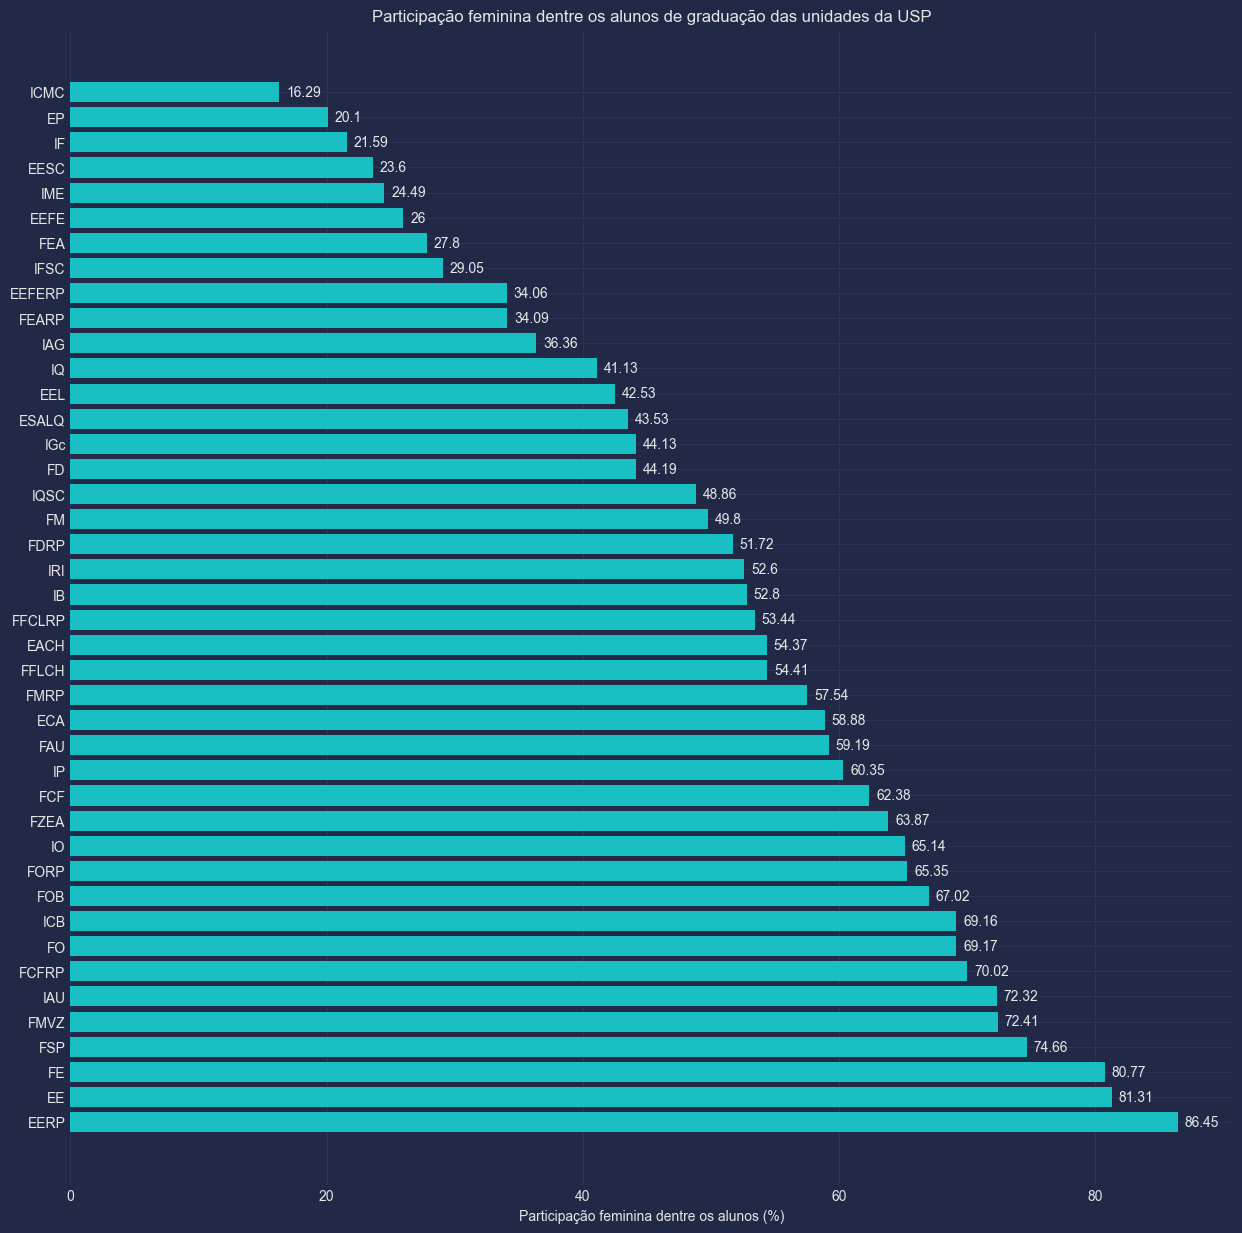

In [90]:
# Plotando um gráfico de barras horizontal
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
plt.figure(figsize=(15, 15))
bars = plt.barh(df2.index, df2['Total'], label='Valores')
plt.title('Participação feminina dentre os alunos de graduação das unidades da USP')
plt.xlabel('Participação feminina dentre os alunos (%)')
plt.bar_label(bars, padding=5)
plt.show()

In [91]:
df2.reset_index()

,Unidade,Total
0,EERP,86.45
1,EE,81.31
2,FE,80.77
3,FSP,74.66
4,FMVZ,72.41
5,IAU,72.32
6,FCFRP,70.02
7,FO,69.17
8,ICB,69.16
9,FOB,67.02
